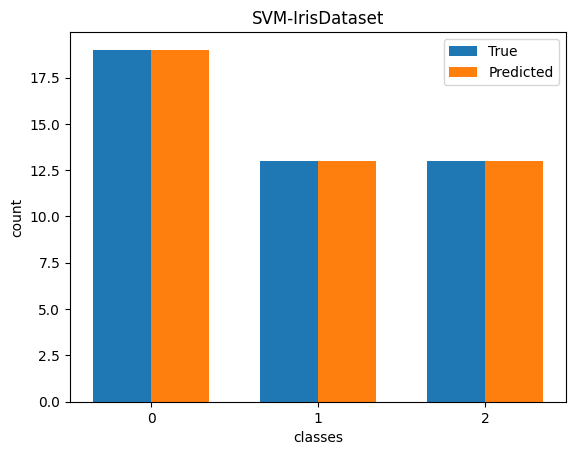

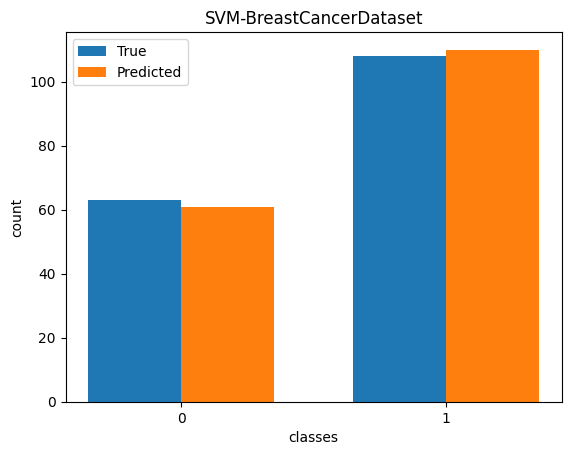

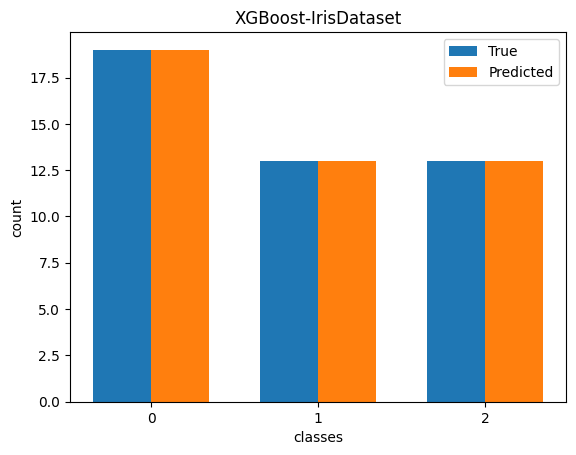

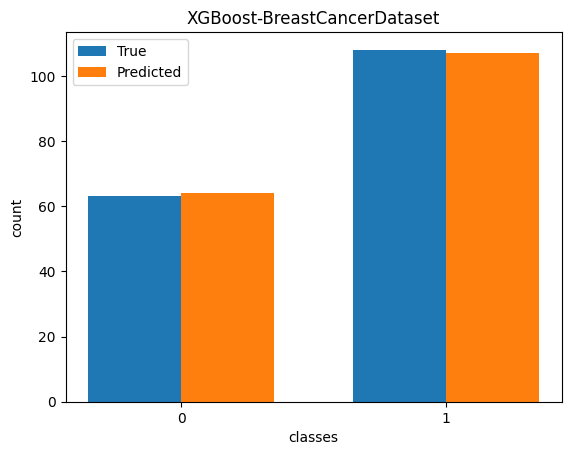

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris,load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Corrected import to SVC
from xgboost import XGBClassifier

# Load datasets
iris=load_iris()
x_iris,y_iris=iris.data,iris.target
Cancer=load_breast_cancer()
x_cancer,y_cancer=Cancer.data,Cancer.target

# Split datasets
x_train_iris,x_test_iris,y_train_iris,y_test_iris=train_test_split(x_iris,y_iris,test_size=0.3,random_state=42)
x_cancer_train,x_cancer_test,y_cancer_train,y_cancer_test=train_test_split(x_cancer,y_cancer,test_size=0.3,random_state=42)

# Train SVM models (Corrected `svc` to `SVC`)
svm_model_iris=SVC(kernel='linear',random_state=42)
svm_model_iris.fit(x_train_iris,y_train_iris)
iris_pred=svm_model_iris.predict(x_test_iris) # Corrected variable name

svm_model_cancer=SVC(kernel='linear',random_state=42)
svm_model_cancer.fit(x_cancer_train,y_cancer_train)
cancer_pred=svm_model_cancer.predict(x_cancer_test)

# Train XGBoost models (Corrected variable names)
xgb_model_iris=XGBClassifier(random_state=42)
xgb_model_iris.fit(x_train_iris,y_train_iris)
xgb_iris_pred=xgb_model_iris.predict(x_test_iris) # Corrected variable name

xgb_model_cancer=XGBClassifier(random_state=42)
xgb_model_cancer.fit(x_cancer_train,y_cancer_train)
xgb_cancer_pred=xgb_model_cancer.predict(x_cancer_test)

# Define plotting function
def plot_class_distribution(y_true,y_pred,title):
  labels=sorted(np.unique(y_true))
  true_counts=[(y_true==l).sum() for l in labels]
  pred_counts=[(y_pred==l).sum() for l in labels]
  x=np.arange(len(labels))
  width=0.35
  fig, ax=plt.subplots()
  ax.bar(x-width/2,true_counts,width,label='True')
  ax.bar(x+width/2,pred_counts,width,label='Predicted')
  ax.set_xlabel('classes')
  ax.set_ylabel('count')
  ax.set_title(title)
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()
  plt.show()

# Plot distributions
plot_class_distribution(y_test_iris,iris_pred,"SVM-IrisDataset")
plot_class_distribution(y_cancer_test,cancer_pred,"SVM-BreastCancerDataset")
plot_class_distribution(y_test_iris,xgb_iris_pred,"XGBoost-IrisDataset")
plot_class_distribution(y_cancer_test,xgb_cancer_pred,"XGBoost-BreastCancerDataset")

# Removed the incorrectly indented and redundant code block below this line.